3
[('A', 'B'), (1, 2), (1, 4), (2, 5), (4, 5), (12, 23), (23, 23)]
['A', 1, 2, 'B', 4, 5, 10, 12, 'C', 23, 'D']
0.636363636364


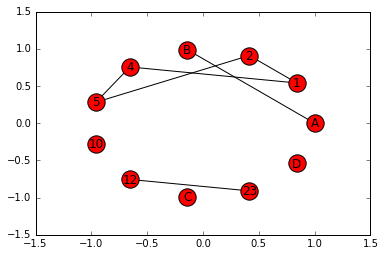

[2, 4]


In [5]:
% matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
a = nx.Graph()
a.add_edge(1,2)
a.add_edge(4,5)
a.add_edges_from([(1,4),(2,5)])
a.add_nodes_from([10,12])
a.add_nodes_from("ABCD")
a.add_edge(23,12)
a.add_edge(23,12)
a.add_edge(23,23)
a.add_edge('A','B')
print a.degree(23)
print a.edges()
print a.nodes()
print len(a.edges())*1.0/len(a.nodes())
pos = nx.circular_layout(a)
nx.draw_networkx(a,pos)
plt.show()
print a.neighbors(5)


In [46]:
x = [[i] for i in range(3)]
x

[[0], [1], [2]]

20


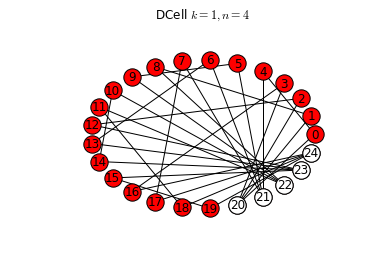

In [87]:
import networkx as nx
import matplotlib.pyplot as plt
class DCell(object):
            

    def __init__(self,n,k):
        self.n = n
        self.k = k
        self.topo = nx.Graph()
        
        
        self.num_of_servers = self.compute_num_servers(n,k)
        self.num_of_cells = self.compute_num_cells(n,k)
        self.num_of_switches = self.compute_num_switches()
        # switches's id
        self.switches_ids = self.compute_switches_ids()
        
        self.generateTopo([],self.topo,n,k)
    # the number of servers of DCell(k) where each switch has n servers
    
    
    def compute_switches_ids(self):
        ret = [self.num_of_servers+i for i in range(self.num_of_switches)]
        #print ret
        return ret
    
    
    def compute_num_servers(self,n,k):
        t0 = n
        if k == 0:
            return t0
        for i in range(k):
            t0 = t0*(t0+1)
        return t0
    
    
    # the number of DCell(k-1) in DCell(k)
    def compute_num_cells(self,n,k):
        if k == 0:
            return 1
        return self.compute_num_servers(n,k-1) + 1
    
    # one siwtch has n servers
    def compute_num_switches(self):
        return self.num_of_servers/self.n
    
    
    def pref_to_id(self,prefix):
        pref = prefix[:]
        #print "pref = ",
        #print pref
        pref.reverse()
        if len(pref) == 0:
            raise Exception("Prefix cannot be empty!")
        if len(pref) == 1:
            return pref[0]
        sum = pref[0]
        for k in range(1,len(pref)):
            sum += pref[k]*self.compute_num_servers(self.n,k-1)

        #print "id = ",
        #print sum
        
        return sum
    
    
    def generateTopo(self,pref,topo,n,k):
        # part 1
        if(k == 0):
            for i in range(n):
                # connect node [pref,i] to its switch
               
                new_pref = pref[:]
                new_pref.append(i)

                id_of_server = self.pref_to_id(new_pref)

                # 若某个server的pref为[2，3]，则他对应的switch的编号是switches_id的第2个
                if len(new_pref) == 1:
                    id_of_switch = self.switches_ids[0]
                else:
                    id_of_switch = self.switches_ids[new_pref[0]]
                #print id_of_switch, id_of_server
                topo.add_edge(id_of_switch,id_of_server)
            return
        # part 2
        #num_cells = self.num_cells
        for i in range(self.num_of_cells):
            new_pref = pref[:]
            new_pref.append(i)
            self.generateTopo(new_pref,topo,n,k-1)
        # part 3
        for i in range(self.compute_num_servers(n,k-1)):
            for j in range(i+1,self.compute_num_cells(n,k)):
                uid_1 = j-1
                uid_2 = i
                n1 = pref[:]
                n1.append(i)
                n1.append(uid_1)
                n2 = pref[:]
                n2.append(j)
                n2.append(uid_2)
                
                sw1 = self.pref_to_id(n1)
                sw2 = self.pref_to_id(n2)
                topo.add_edge(sw1,sw2)

    def show(self):
        pos = nx.circular_layout(self.topo)
        nx.draw_networkx(self.topo,pos,nodesize=100)
        nx.draw_networkx_nodes(self.topo,pos,self.switches_ids,node_color='w')
        
        plt.title(r"DCell $k = {},n = {}$".format(self.k,self.n))
        plt.axis('off')
        plt.show()
dc = DCell(4,1)
print dc.num_of_servers
dc.show()


In [84]:
x = [1,2]
x.extend([3,4])
x.reverse()
x

[4, 3, 2, 1]